## IMPORTING DATA :

### Load the data file using pandas :

In [77]:
import pandas as pd

In [78]:
df=pd.read_excel("data.xlsx")

We have now successfully imported the data and assigned the dataframe name as "df".

## DATA PRE-PROCESSING :

### Identifying the structure of the data :

In [79]:
df.shape

(303, 14)

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

For the dataset, all the columns have numerical values with data type as either integer or float.

We have 14 headers in total.

Our dependent variable is "target" and other 13 features are independent variables.

### Finding missing values :

In [82]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We have Nil missing values for any of the columns in the dataset.

### Finding duplicate entries :

In [83]:
df=df.drop_duplicates()

In [84]:
df.shape

(302, 14)

Previously, we had 303 rows and 14 columns. After removing the duplicate entries(i.e - 1 item) we now have 302 rows and 14 columns.

### Fixing items according to variable description for the dataset :

### Variable description : 

age 	             - age in years

sex 	             - (1 = male; 0 = female)

cp 	                 - chest pain type

trestbps 	         - resting blood pressure (in mm Hg on admission to the hospital)

chol 	             - serum cholestoral in mg/dl

fbs 	             - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg 	         - resting electrocardiographic results

thalach 	         - maximum heart rate achieved

exang 	             - exercise induced angina (1 = yes; 0 = no)

oldpeak 	         - ST depression induced by exercise relative to rest

slope 	             - the slope of the peak exercise ST segment

ca 	                 - number of major vessels (0-3) colored by flourosopy

thal 	             - 3 = normal; 6 = fixed defect; 7 = reversable defect

target 	             - 1 or 0


### Checking the distribution of data for Independent features :

In [85]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [86]:
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [87]:
df.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

In [88]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

As we can see - variables "sex","fbs" and "exang" have categorical numerical values ( Either 0 or 1 ) and are already in line with the variable description mentioned above.

However, for variable "ca", we have values ranging from 0 to 4.

Since our requirement is only between the range (0-3) on number of major vessels colored by fluoroscopy, I will drop the entries beyond this range.

In [89]:
df[df["ca"]>3].shape

(4, 14)

In [90]:
df.drop(df[df["ca"]>3].index,inplace=True)

In [91]:
df.shape

(298, 14)

We have successfully dropped 4 entries to stick on to our requirement for further analysis. New shape of the dataframe "df" is now 298 rows with 14 columns.

In [92]:
df.thal.value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

As per our requirement, 3=normal, 6=fixed defect and 7=Reversible defect.

However, the datapoints that we have for the feature "thal" is between range 0 to 3.

Lets consider 0 as "No defect" and will drop from our analysis as we only have 2 entries.

For values 1 to 3 in the dataset lets do the following: 

Normal - Value 1 to be replaced with 3

Fixed defect - Value 2 to be replaced with 6

Reversible defect - Value 3 to be replaced with 7.

In [93]:
df.drop(df[df["thal"]==0].index,inplace=True)

In [94]:
df.shape

(296, 14)

In [95]:
df['thal'] = df['thal'].replace([1,2,3], [3,6,7])

In [96]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,3,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,6,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,7,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,7,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,7,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,7,0


The dataframe shape is now 296 rows with 14 columns

In [97]:
df.to_excel('Transformed_dataset.xlsx',index=None,header=True)

###  Checking the distribution of data for target variable :

In [98]:
df["target"].value_counts()

1    160
0    136
Name: target, dtype: int64

Lets consider the following for Independent variable "target" from the dataset :

1 --->  Has Heart disease

0 --->  No Heart disease

###  Statistical summary of the data :

In [99]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,6.206081,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.946768,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,6.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


Insights :

a.) Half of the patients in the dataset are below the age - 56

b.) Average resting blood pressure(in mm Hg) of patients on admission to Hospital is 131.6

c.) cholesterol level ranges from 126 till 564. 564 is such an alarming rate when it comes to cholesterol levels.

d.) Dataset takes into consideration the CVD across youths, matured adults and elderly people. The datapoints contain minimum age as 29 and maximum age as 77 for this analysis.

## EXPLORATORY ANALYSIS :

###  Identifying the categorical variables and describing them :

In [100]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

From the above results, I infer the following :

1.) Though Age may appear to be a categorical variable, the distribution is wide and we have 41 unique values. Lets not consider it as a categorical variable.

2.) Variables such as "trestbps","chol","thalach" and "oldpeak" are all continuous variables

3.) Our task is to identify the categorical variables and describing them.
Variables such as 'sex', 'cp','fbs','restecg','exang','slope', 'ca', 'thal', 'target' are all categorical variables with limited counts.

### Visualising the categorical variables :

In [101]:
categorical_variables = ['sex', 'cp','fbs','restecg','exang','slope', 'ca', 'thal', 'target']

In [102]:
import matplotlib.pyplot as plt

In [103]:
import seaborn as sns

In [104]:
import warnings
warnings.filterwarnings("ignore")

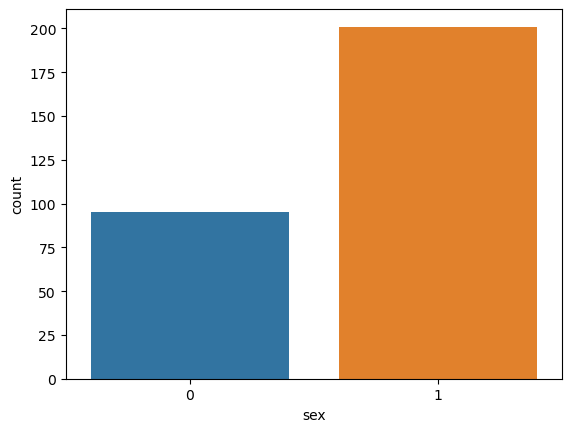

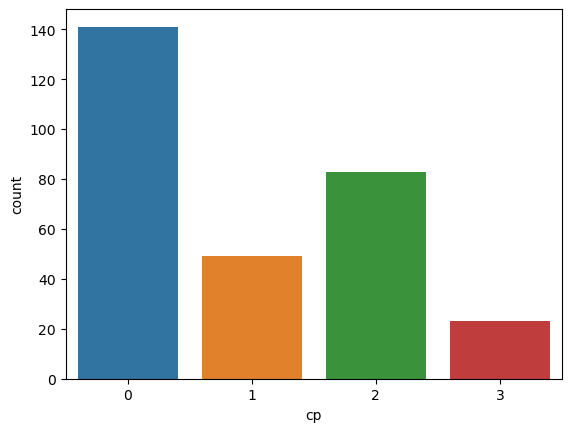

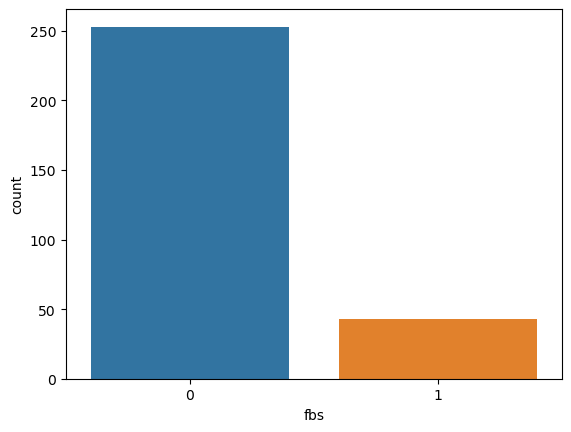

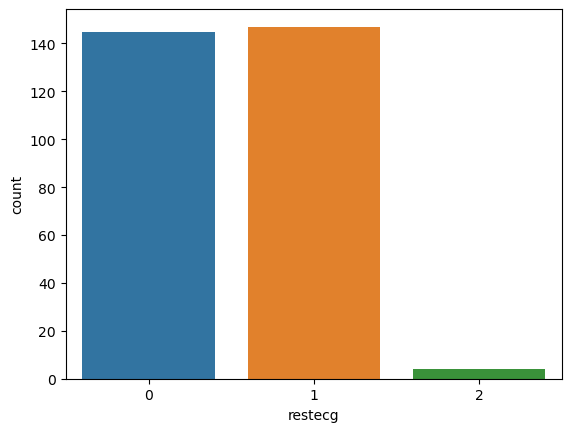

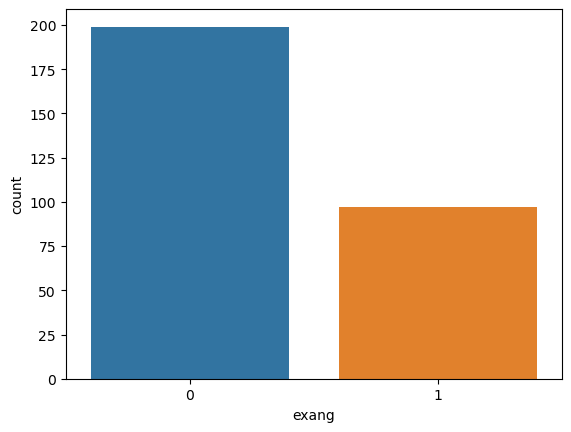

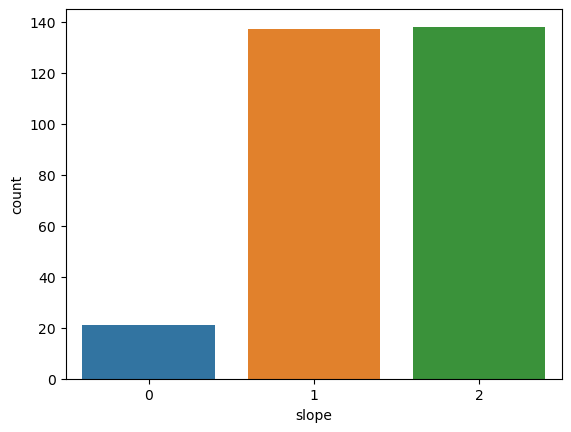

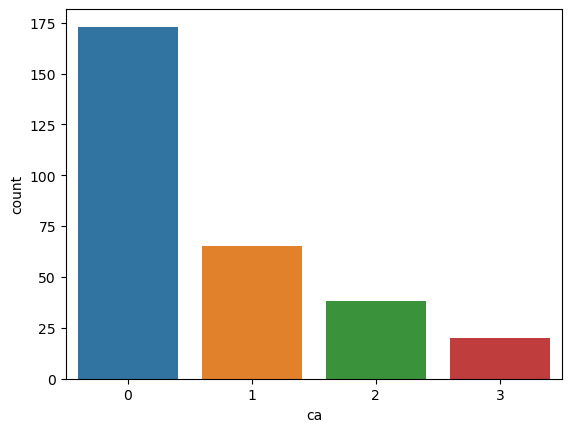

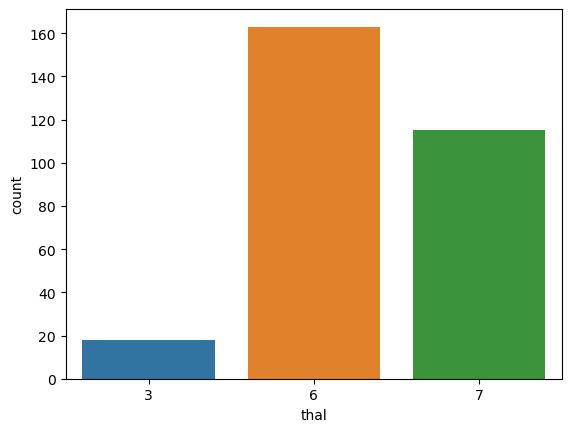

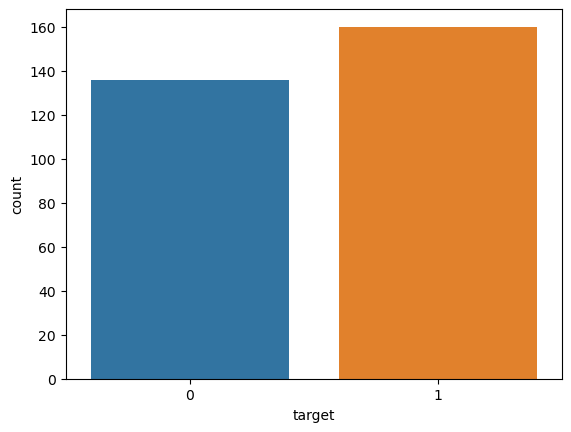

In [105]:
for col in categorical_variables:
    sns.countplot(df[col])
    plt.show()

Insights :

a.) No of female patients are close to 100 and there are more number of Male patients - i.e close to 200.

b.) Approximately 140 observations in the dataset are the patients with chestpain type as 0.

c.) Very less number of patients have fasting blood sugar > 120 mg/dl.

d.) Almost equal distribution of datapoints for subcategories in restecg(especially 0 and 1).

e.) Around 80 to 90 patients experience exercise induced angina - i.e discomfort in the chest. This contributes to 30 percent of the patients in the entire dataset.

f.) The slope of the peak exercise ST segment is an important parameter that reflects the rate of change of the ST segment during exercise.

Slope 0: A normal ST segment that remains isoelectric (flat) during exercise stress testing.

Slope 1: A mildly upsloping ST segment during exercise stress testing, with a rise of 1 mm or less per minute.

Slope 2: A steeply upsloping ST segment during exercise stress testing, with a rise of more than 1 mm per minute.

There are close to 140 patients each with heart activity under Slope 1 and Slope 2 conditions.

g.) Variable "ca" denotes number of major vessels (0-3) colored by flourosopy.

The number of major vessels colored by fluoroscopy is a variable that is often used in medical tests and procedures to assess the extent of coronary artery disease (CAD).

The number of major vessels colored by fluoroscopy ranges from 0 to 3, depending on the number of major coronary arteries that are affected by CAD.

Score 0 - No visible blockages or narrowing of the major coronary arteries

Score 1 - 1 major coronary artery affected

Score 2 - 2 major coronary arteries affected

Score 3 - 3 major coronary arteries affected.

Close to 175 patients doesnt have any issues with coronary arteries which means that more than 50 percent of observations doesnt have issues with coronary arteries.

Around approximately 60 observations have Score 1 - i.e atleast 1 coronary artery being affected.

h.) Thalassemia type 3 is normal and there are less than 20 patients in this category.

Thalassemia type 6 is more frequent and there are almost 160 patients who fall under this category.This means that there are more number of patients with heart disease under Fixed defect type of Thalassemia.Patients with fixed defect usually have the red blood cells always be smaller and less able to carry oxygen. Thalassemia could be a contributor to heart disease. However, there are also other factors associated with heart disease.

Thalassemia type 7 is generally rare but we can see 100 observations under this category.

i.) For dependent variable "target" which has subcategories 0(No heart disease) and 1(Has heart disease) - around 160 observations have heart disease.

What this means is that we have more than 50 percentage of patients with heart disease as per the available dataset.

###  Occurrence of CVD across Age :

Text(0, 0.5, 'Frequency')

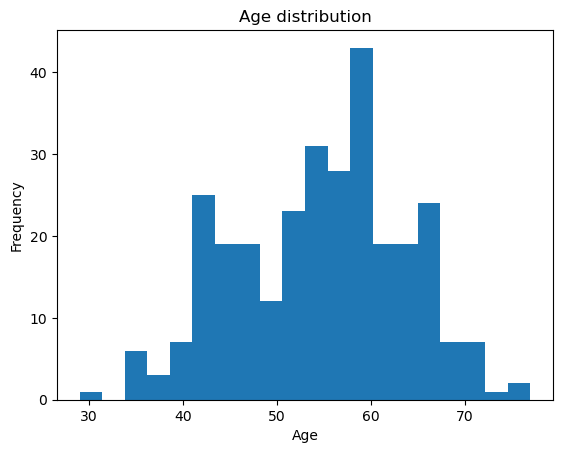

In [106]:
plt.hist(df["age"],bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

It seems that most of the patients with CVD is between the age groups 40 to 60 as the distribution is higher

Text(0, 0.5, 'No. of observations')

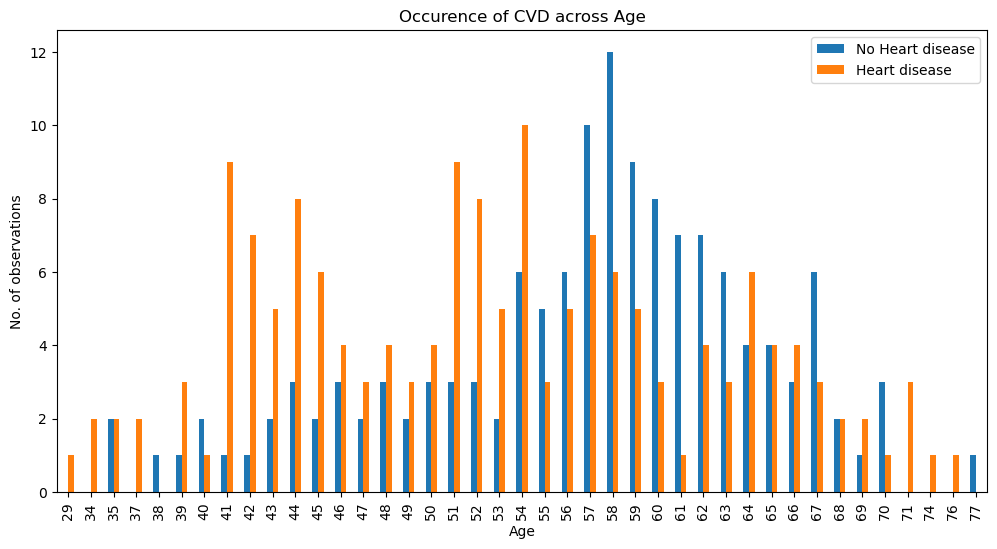

In [107]:
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(12,6))
plt.title("Occurence of CVD across Age")
plt.legend(["No Heart disease","Heart disease"])
plt.xlabel("Age")
plt.ylabel("No. of observations")

In the above graph, the plot legend for target variable was 0 and 1.

0 being patients without Heart disease and 1 being patients with Heart disease.

I had manually changed the labels to "Heart disease" instead of 1 and "No Heart disease" instead of 0 for our better understanding.

Though there are higher counts for patients without heart disease for Ages 57 and 58, overall count for patients with heart disease is significantly higher for age group between 40 to 60.

###  Analysis on heart attack based on anomalies in the Resting Blood Pressure of the patient :

To get a better sense of the relationship between resting blood pressure and the presence of heart disease, we can create a box plot of the two variables.

Text(0, 0.5, 'Resting Blood Pressure')

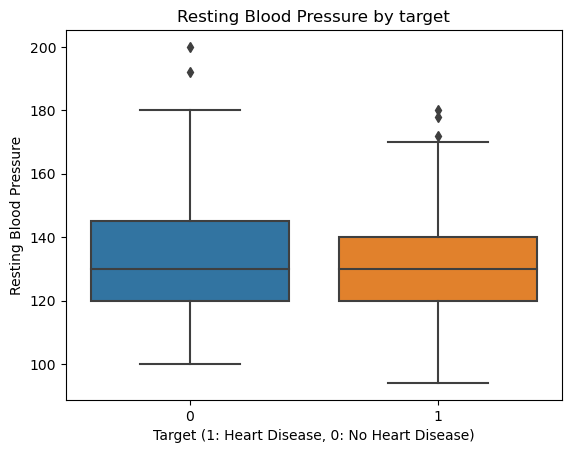

In [108]:
sns.boxplot(df['target'],df['trestbps'])
plt.title('Resting Blood Pressure by target')
plt.xlabel("Target (1: Heart Disease, 0: No Heart Disease)")
plt.ylabel("Resting Blood Pressure")

Insights :

a.) There is no significant difference in median when it comes to resting blood pressure for patients with heart disease and patients without heart disease.The difference is very very minimal.

b.) There is more variability in resting blood pressure among patients without heart disease, with a wider interquartile range. 

c.)There are outliers in both(resting blood pressure for patients with and without heart disease).

d.) There is significant overlap in the distribution of resting blood pressure between the two groups, with many patients without heart disease having resting blood pressure values in the range typically associated with heart disease, and many patients with heart disease having resting blood pressure values within the range typically associated with a healthy heart.

c.) Resting blood pressure is not helping much in diagnosis of heart disease.

###  Study the composition of overall patients w.r.t. Gender :

Text(0, 0.5, 'No.of observations')

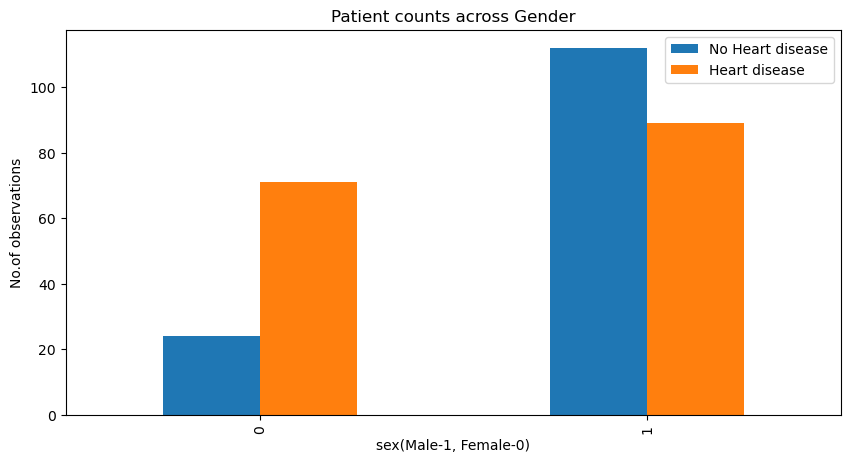

In [109]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5))
plt.title("Patient counts across Gender")
plt.legend(["No Heart disease","Heart disease"])
plt.xlabel("sex(Male-1, Female-0)")
plt.ylabel("No.of observations")

Insights :

a.) Overall, there are more number of Male patients compared to Female patients for diagnosing the heart disease.

b.) Males are vulnerable to heart disease. However, the count of male patients without Heart disease is also significantly high.

c.) Females, on the other hand appears to be more vulnerable to heart disease as the number of female patients without heart disease is comparitively low.

### a.) Describe the relationship between cholesterol levels and our target variable.
### b.) What can be concluded about the relationship between peak exercising and occurrence of heart attack?
### c.) Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

To answer the above questions, all we need to do is to identify the relationship between the variables and we can get further insights.

Correlation is the best way to identify the relationship between the variables.

Correlation ranges from -1 to +1.

A positive correlation has to be more than 0.

On the other hand, if the correlation is 0, it means no correlation and negative values will result in inverse relationship between the variables.

Lets visualise the correlation between the variables using a heatmap.

<AxesSubplot:>

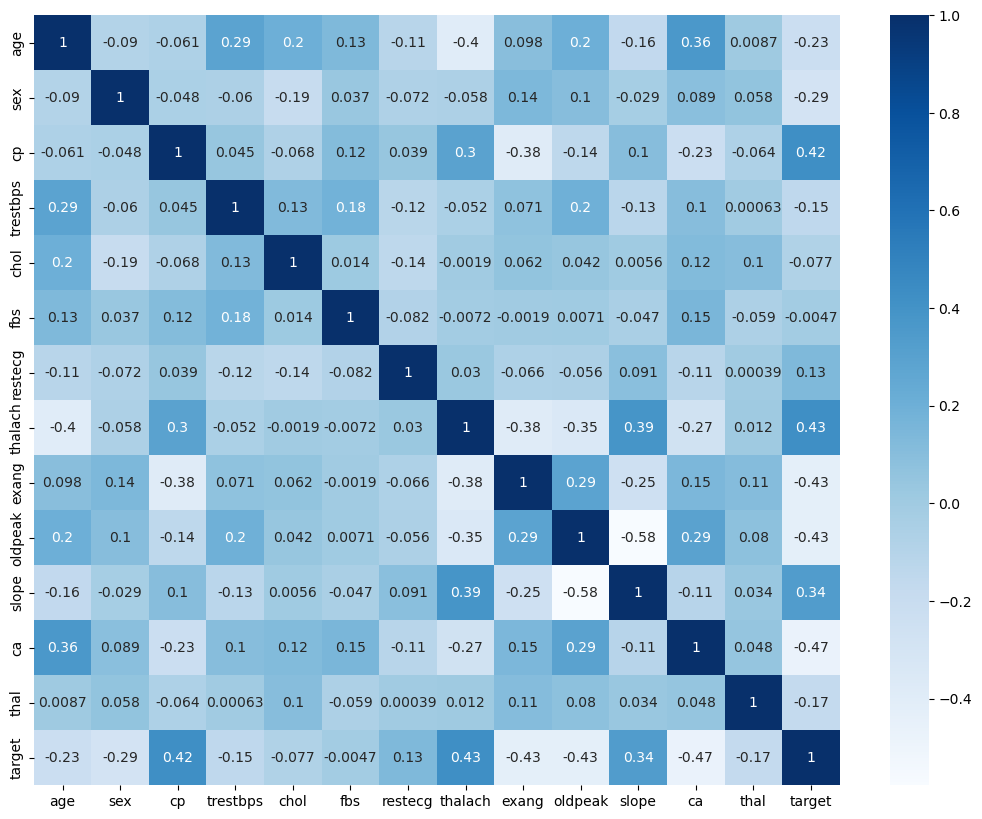

In [110]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

a.) We have negative correlation between cholesterol and target varaiable.
What this means is that variable("chol") has no relationship or perhaps negative relationship with variable (target) which points to heart disease.

b.) Peak exercise refers to the maximum level of physical exertion that a person can sustain during exercise. Here the variable "oldpeak" represents it. 
Variable "oldpeak" has negative correlation with target variable. This means that the variables are not explaining each other.

c.) Thalassemia in this case refers to the variable "thal". Since the correlation value is -0.17, there is a negative correlation for it with the variable "target".

d.) Variable "thalach" has a positive correlation with the variable "target". A positive correlation means that as the values of one variable increase, the values of the other variable tend to increase as well. There may or may not be a linear relationship based on the strength of the correlation that exist between variables.

### Plotting a pairplot to understand the relationship between variables :

Lets ignore the categorical variables and consider only the continuous variables 

Pairplots are also a great way to immediately see the correlations between all variables. 

In [111]:
dataextract=df[['age','trestbps','chol','thalach','oldpeak']]

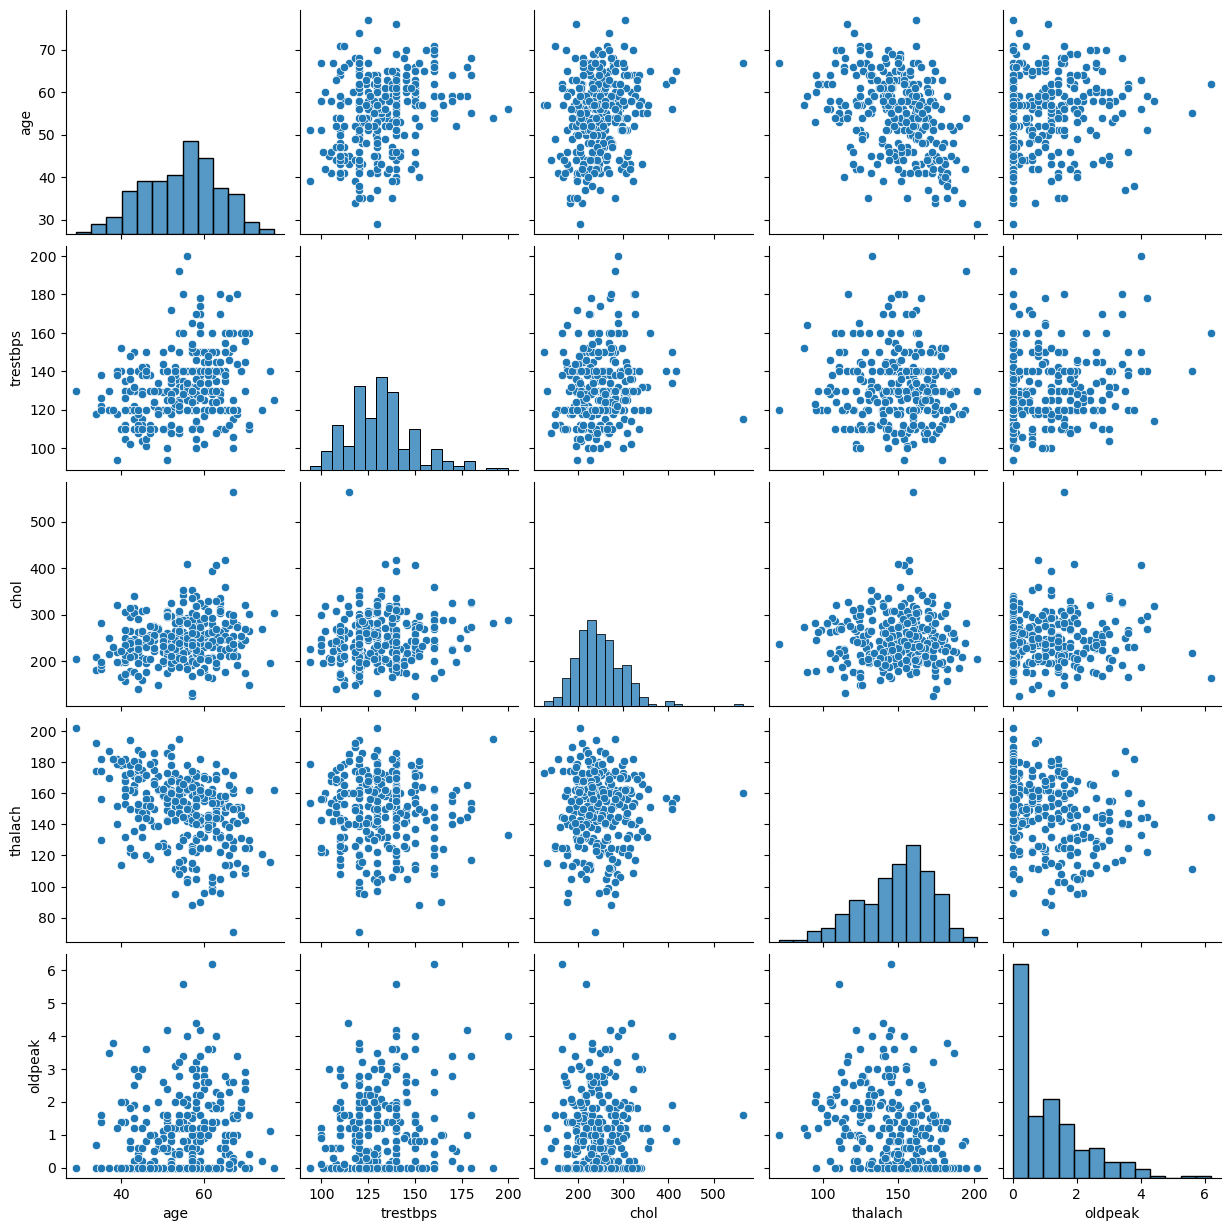

In [112]:
sns.pairplot(dataextract)

Insights :
    
a.) There is a weak correlation and not perfectly linear when it comes to relationship between age and resting blood pressure.

b.) Most of the variables that we see carries a very weak relationship / non-linear relationship with other continuous variables.

## TEST TRAIN SPLIT :

Inorder to perform a model building, we need to first Split the dataset into train set and test set, then train the model using Logistic regression technique and finally evaluate the outcome of test results.

Lets now Split the features(13 independent variables) and "target" which is a target variable.
X=features
Y=target variable

In [113]:
X=df.drop(columns='target',axis=1)

In [114]:
Y=df['target']

In [115]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,6
4,57,0,0,120,354,0,1,163,1,0.6,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,7
299,45,1,3,110,264,0,1,132,0,1.2,1,0,7
300,68,1,0,144,193,1,1,141,0,3.4,1,2,7
301,57,1,0,130,131,0,1,115,1,1.2,1,1,7


In [116]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 296, dtype: int64

We have now successfully performed a split of our target variable ( with shape - 296 rows 1 column ) and other features (with shape - 296 rows and 13 columns ).

However, we need to further divide both X and Y set for our train and test set.

Lets consider 70 percent of our data to go for training set and 30 percent of our data for test set.

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=123)

We used Stratify as a parameter so that we get the data distribution that is unbiased for both the X and Y train and test sets. 

In [119]:
X_train.shape

(207, 13)

In [120]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
108,50,0,1,120,244,0,1,162,0,1.1,2,0,6
235,51,1,0,140,299,0,1,173,1,1.6,2,0,7
287,57,1,1,154,232,0,0,164,0,0.0,2,1,6
67,45,0,1,130,234,0,0,175,0,0.6,1,0,6
270,46,1,0,120,249,0,0,144,0,0.8,2,0,7


In [121]:
X_test.shape

(89, 13)

In [122]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,69,1,2,140,254,0,0,146,0,2.0,1,3,7
211,61,1,0,120,260,0,1,140,1,3.6,1,1,7
1,37,1,2,130,250,0,1,187,0,3.5,0,0,6
143,67,0,0,106,223,0,1,142,0,0.3,2,2,6
271,61,1,3,134,234,0,1,145,0,2.6,1,2,6


In [123]:
Y_train.shape

(207,)

In [124]:
Y_train.head()

108    1
235    0
287    0
67     1
270    0
Name: target, dtype: int64

In [125]:
Y_test.shape

(89,)

In [126]:
Y_test.head()

249    0
211    0
1      1
143    1
271    0
Name: target, dtype: int64

## MODEL BUILDING - LOGISTIC REGRESSION :

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
mymodel=LogisticRegression()

Logistic regression model with Train data :

In [129]:
mymodel.fit(X_train,Y_train)

LogisticRegression()

### Prediction on Train Data :

In [130]:
Y_pred_train=mymodel.predict(X_train)

In [131]:
Y_pred_train

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [132]:
Y_pred_train.shape

(207,)

The predicted results - i.e Y_pred_train values are within an array and this needs to be fixed and imported to Dataframe.

The reason we are doing this is because we can then perform a concat to see the final file on train data which includes - X_train,Y_train,Y_pred_train.

In [133]:
Y_pred_train=pd.DataFrame(Y_pred_train,columns=['Y_pred_train'])

In [134]:
Y_pred_train.shape

(207, 1)

We have now trained our model with X_train set and it gave us Y_predictions on train dataset.

Lets now concatenate the files to see the final file on train data which includes - X_train,Y_train,Y_pred_train

In [135]:
Trainedset_with_predictions=pd.concat([X_train.reset_index(drop=True),Y_train.reset_index(drop=True),Y_pred_train.reset_index(drop=True)],axis=1)

In [136]:
Trainedset_with_predictions.shape

(207, 15)

In [137]:
Trainedset_with_predictions.to_csv('Predictions_train.csv',index=None,header=True)

### Prediction on Test Data :

In [138]:
Y_pred_test=mymodel.predict(X_test)

In [139]:
Y_pred_test

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1], dtype=int64)

In [140]:
Y_pred_test.shape

(89,)

The predicted results - i.e Y_pred_test values are within an array and this needs to be fixed and imported to Dataframe.

The reason we are doing this is because we can then perform a concat to see the final file on test data which includes - X_test,Y_test,Y_pred_test.

In [141]:
Y_pred_test=pd.DataFrame(Y_pred_test,columns=['Y_pred_test'])

In [142]:
Y_pred_test.shape

(89, 1)

We have now built our model with X_test set and it gave us Y_predictions on test dataset.

Lets now concatenate the files to see the final file on test data which includes - X_test,Y_test,Y_pred_test

In [143]:
Testset_with_predictions=pd.concat([X_test.reset_index(drop=True),Y_test.reset_index(drop=True),Y_pred_test.reset_index(drop=True)],axis=1)

In [144]:
Testset_with_predictions.shape

(89, 15)

In [145]:
Testset_with_predictions.to_csv('Predictions_test.csv',index=None,header=True)

## MODEL EVALUATION :

### Building a confusion matrix :

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
cm = confusion_matrix(Y_test, Y_pred_test)

In [148]:
print(cm)

[[34  7]
 [ 3 45]]


Text(0.5, 23.52222222222222, 'Predicted Values')

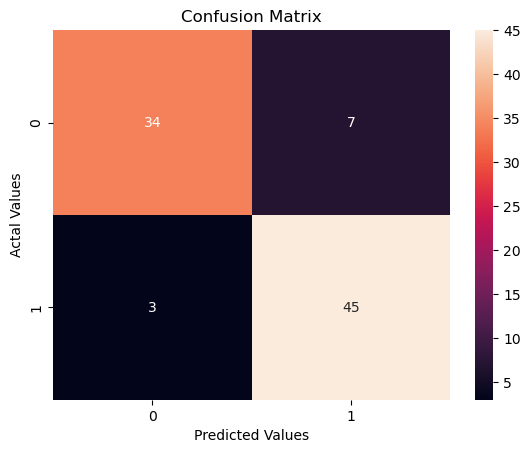

In [149]:
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
            

Interpretation :
A confusion matrix is a table that summarizes the performance of a classification model by showing the number of correct and incorrect predictions made by the model. It is a useful tool for evaluating the performance of a classification model and understanding the types of errors it makes.

The confusion matrix consists of 4 components :

1.) True positives (TP): The number of instances that are correctly predicted as positive (e.g., the model correctly identifies a disease).

2.) True negatives (TN): The number of instances that are correctly predicted as negative (e.g., the model correctly identifies a non-disease).

3.) False positives (FP): The number of instances that are incorrectly predicted as positive (e.g., the model predicts a disease when there is none).

4.) False negatives (FN): The number of instances that are incorrectly predicted as negative (e.g., the model predicts no disease when there is one).

In our case, once we print cm, we got 4 results in the form of a matrix.

Rows represent the actual class labels and columns represent the Predicted values in a confusion matrix.

As per the heatmap above, In the first row, 34 is the count that is actually negative and the model accurately predicts as negative (True Negative). This means there are 34 patients without heart disease and the model is able to predict it.

In the first row, 7 is the count that is actually negative but the model predicts as positive (False Positive).This means there are 7 patients without heart disease and the model predicts them as patients with heart disease.

In the second row, 3 is the count that is actually positive but the model predicts as negative (False Negative).This means there are 3 patients with heart disease but the model predicts them as patients without heart disease.

In the second row, 45 is the count that is actually positive and the model correctly predicts it as positive (True Positive).This means there are 45 patients with heart disease and the model predicts them as patients with heart disease.

To summarize, our baseline model was able to predict most of the values correctly with very little errors for the test dataset.

Lets, now check the Model accuracy score which tells us how good the model is performing.


### Accuracy score :

In [150]:
from sklearn.metrics import accuracy_score

In [151]:
test_data_accuracy=accuracy_score(Y_test,Y_pred_test)

In [152]:
print("Accuracy score is : ",test_data_accuracy)

Accuracy score is :  0.8876404494382022


As you can see, the Accuracy score for test dataset is 88.7 which is a very good score.

What this means is - Out of 100 percentage, our model is able to predict 88.7 percentage of entries correctly.